In [5]:
import pandas as pd

# Load dataset (you can download 'winequality-red.csv' or 'winequality-white.csv')
df = pd.read_csv('winequality-red.csv')

# Show first rows
print(df.head())

# Check shape and missing values
print(df.info())
print(df.isnull().sum())


  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                  

In [3]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [7]:
import pandas as pd

# Load with correct separator
red_df_fixed = pd.read_csv('winequality-red.csv', sep=';')

# Check it's loaded
print(red_df_fixed.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values (if any)
df = df.dropna()

# Split: features & target
X = red_df_fixed.drop('quality', axis=1)
y = red_df_fixed['quality']


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (important for GD!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
import time
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso

results = {}

# Linear Regression
start = time.time()
lin_reg = LinearRegression().fit(X_train_poly, y_train)
end = time.time()
y_pred_lin = lin_reg.predict(X_test_poly)
results['Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lin)),
    'R²': r2_score(y_test, y_pred_lin),
    'Time (s)': end - start
}

# SGD Regressor
start = time.time()
sgd = SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train_poly, y_train)
end = time.time()
y_pred_sgd = sgd.predict(X_test_poly)
results['SGD Regressor'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_sgd)),
    'R²': r2_score(y_test, y_pred_sgd),
    'Time (s)': end - start
}

# Ridge
start = time.time()
ridge = Ridge(alpha=1.0).fit(X_train_poly, y_train)
end = time.time()
y_pred_ridge = ridge.predict(X_test_poly)
results['Ridge'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'R²': r2_score(y_test, y_pred_ridge),
    'Time (s)': end - start
}

# Lasso
start = time.time()
lasso = Lasso(alpha=0.01).fit(X_train_poly, y_train)
end = time.time()
y_pred_lasso = lasso.predict(X_test_poly)
results['Lasso'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    'R²': r2_score(y_test, y_pred_lasso),
    'Time (s)': end - start
}

# Show results table
results_df = pd.DataFrame(results).T
print("\nRegression Models Comparison:\n", results_df)



Regression Models Comparison:
                            RMSE            R²  Time (s)
Linear Regression  6.179454e-01  4.156801e-01  0.147975
SGD Regressor      2.270338e+11 -7.887359e+22  0.013178
Ridge              6.174127e-01  4.166870e-01  0.002989
Lasso              6.141072e-01  4.229162e-01  0.005317


In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Make polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Original shape:", X_train_scaled.shape)
print("Poly shape:", X_train_poly.shape)


Original shape: (1279, 11)
Poly shape: (1279, 77)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict
y_pred_lin = lin_reg.predict(X_test_poly)

# Evaluate
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression MSE:", mse_lin)
print("Linear Regression R²:", r2_lin)


Linear Regression MSE: 0.38185650165750096
Linear Regression R²: 0.4156800644102856


In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)
sgd_reg.fit(X_train_poly, y_train)

y_pred_sgd = sgd_reg.predict(X_test_poly)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("SGD Regressor MSE:", mse_sgd)
print("SGD Regressor R²:", r2_sgd)


SGD Regressor MSE: 8.576253456250417e+22
SGD Regressor R²: -1.3123453039047844e+23


In [12]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_poly, y_train)
y_pred_ridge = ridge_reg.predict(X_test_poly)

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train_poly, y_train)
y_pred_lasso = lasso_reg.predict(X_test_poly)

print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R²:", r2_score(y_test, y_pred_ridge))

print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R²:", r2_score(y_test, y_pred_lasso))


Ridge MSE: 0.38119845303321237
Ridge R²: 0.4166870157862349
Lasso MSE: 0.37712761499468134
Lasso R²: 0.4229162453794084


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Binarize quality: Good (>=7) vs Bad (<7)
y_train_bin = (y_train >= 7).astype(int)
y_test_bin = (y_test >= 7).astype(int)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_bin)

y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test_bin, y_pred_log))
print("Logistic Regression F1:", f1_score(y_test_bin, y_pred_log))


Logistic Regression Accuracy: 0.865625
Logistic Regression F1: 0.37681159420289856


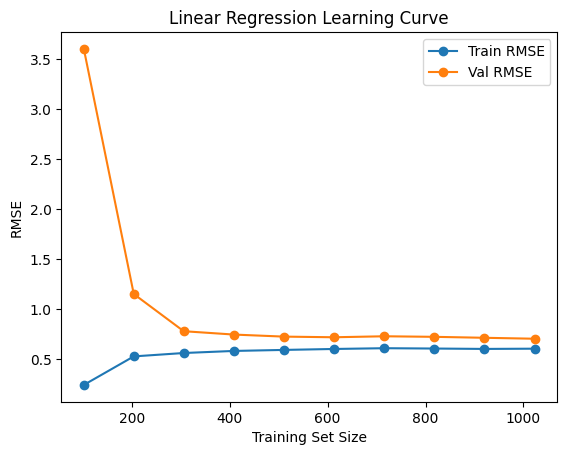

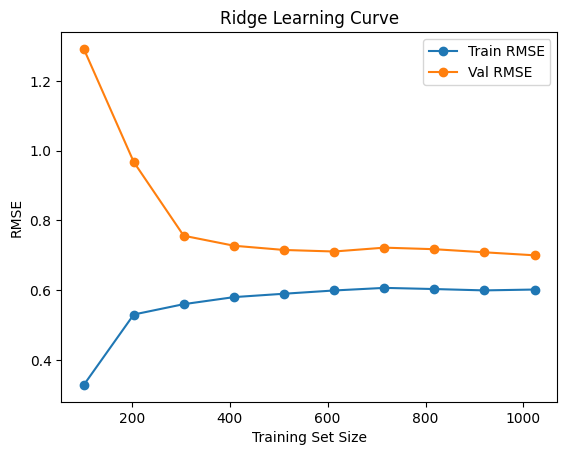

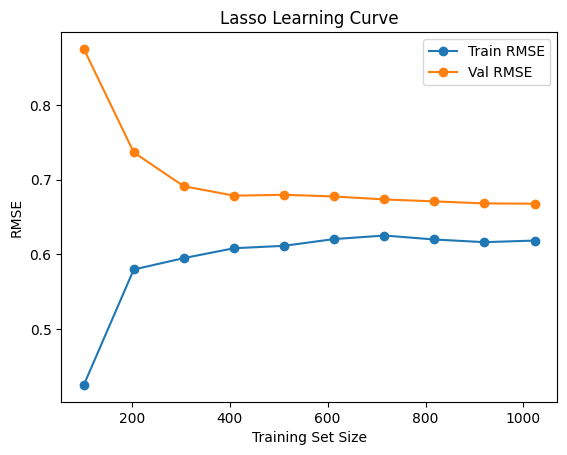

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_rmse = np.sqrt(-train_scores)
    val_rmse = np.sqrt(-val_scores)

    plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label='Train RMSE')
    plt.plot(train_sizes, val_rmse.mean(axis=1), 'o-', label='Val RMSE')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

plot_learning_curve(lin_reg, X_train_poly, y_train, "Linear Regression Learning Curve")
plot_learning_curve(ridge_reg, X_train_poly, y_train, "Ridge Learning Curve")
plot_learning_curve(lasso_reg, X_train_poly, y_train, "Lasso Learning Curve")


In [15]:
from sklearn.model_selection import GridSearchCV

# Example: Ridge Regression alpha tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

print("Best alpha:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)


Best alpha: {'alpha': 100}
Best score (MSE): 0.46693090197187936


In [17]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))


In [19]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso

# Store results here
results = {}

# Linear Regression
start = time.time()
lin_reg = LinearRegression().fit(X_train_poly, y_train)
end = time.time()
y_pred_lin = lin_reg.predict(X_test_poly)
results['Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lin)),
    'R²': r2_score(y_test, y_pred_lin),
    'Time (s)': end - start
}

# SGD Regressor
start = time.time()
sgd = SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train_poly, y_train)
end = time.time()
y_pred_sgd = sgd.predict(X_test_poly)
results['SGD Regressor'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_sgd)),
    'R²': r2_score(y_test, y_pred_sgd),
    'Time (s)': end - start
}

# Ridge Regression
start = time.time()
ridge = Ridge(alpha=1.0).fit(X_train_poly, y_train)
end = time.time()
y_pred_ridge = ridge.predict(X_test_poly)
results['Ridge'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'R²': r2_score(y_test, y_pred_ridge),
    'Time (s)': end - start
}

# Lasso Regression
start = time.time()
lasso = Lasso(alpha=0.01).fit(X_train_poly, y_train)
end = time.time()
y_pred_lasso = lasso.predict(X_test_poly)
results['Lasso'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    'R²': r2_score(y_test, y_pred_lasso),
    'Time (s)': end - start
}

# Convert to DataFrame for pretty table
results_df = pd.DataFrame(results).T
print(results_df)


                           RMSE            R²  Time (s)
Linear Regression  6.179454e-01  4.156801e-01  0.072232
SGD Regressor      2.334660e+11 -8.340610e+22  0.011605
Ridge              6.174127e-01  4.166870e-01  0.058403
Lasso              6.141072e-01  4.229162e-01  0.011873


In [23]:
# Top features for Ridge
feature_names = poly.get_feature_names_out(X.columns)
coefs_ridge = ridge.coef_

top_idx = np.argsort(np.abs(coefs_ridge))[-10:]
print("\nTop 10 Ridge Coefficients:")
for idx in reversed(top_idx):
    print(f"{feature_names[idx]}: {coefs_ridge[idx]:.4f}")



Top 10 Ridge Coefficients:
alcohol: 0.2848
sulphates: 0.2497
fixed acidity density: 0.2353
density pH: 0.2182
fixed acidity^2: -0.1874
fixed acidity pH: -0.1793
total sulfur dioxide: -0.1738
citric acid pH: -0.1697
volatile acidity: -0.1681
total sulfur dioxide density: -0.1636


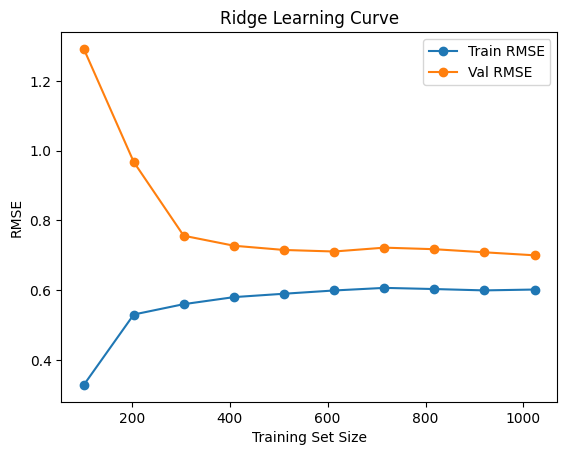

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_rmse = np.sqrt(-train_scores)
    val_rmse = np.sqrt(-val_scores)

    plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label='Train RMSE')
    plt.plot(train_sizes, val_rmse.mean(axis=1), 'o-', label='Val RMSE')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

plot_learning_curve(ridge, X_train_poly, y_train, "Ridge Learning Curve")


In [25]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, f1_score

# Binarize target: good (>=7) vs bad (<7)
y_train_bin = (y_train >= 7).astype(int)
y_test_bin = (y_test >= 7).astype(int)

# Logistic Regression
start = time.time()
log_reg = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train_bin)
end = time.time()
y_pred_log = log_reg.predict(X_test_scaled)

acc_log = accuracy_score(y_test_bin, y_pred_log)
f1_log = f1_score(y_test_bin, y_pred_log)
time_log = end - start

# SGD Classifier
start = time.time()
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train_scaled, y_train_bin)
end = time.time()
y_pred_sgd = sgd_clf.predict(X_test_scaled)

acc_sgd = accuracy_score(y_test_bin, y_pred_sgd)
f1_sgd = f1_score(y_test_bin, y_pred_sgd)
time_sgd = end - start

# Show classification results
results_classification = {
    'Logistic Regression': {
        'Accuracy': acc_log,
        'F1-score': f1_log,
        'Time (s)': time_log
    },
    'SGD Classifier': {
        'Accuracy': acc_sgd,
        'F1-score': f1_sgd,
        'Time (s)': time_sgd
    }
}

df_classification = pd.DataFrame(results_classification).T
print("\nClassification Models Comparison:\n", df_classification)



Classification Models Comparison:
                      Accuracy  F1-score  Time (s)
Logistic Regression  0.865625  0.376812  0.107152
SGD Classifier       0.837500  0.333333  0.014980


In [27]:
# Softmax Regression from scratch (basic)
import numpy as np

# Sample dummy data (m samples, n features)
np.random.seed(42)
m, n = 100, 3
X = np.random.rand(m, n)
X_b = np.c_[np.ones((m, 1)), X]  # add bias
y = np.random.randint(0, 3, m)   # 3 classes

# One-hot encode labels
y_onehot = np.zeros((m, 3))
y_onehot[np.arange(m), y] = 1

# Initialize theta
theta = np.random.randn(n + 1, 3)

# Softmax function
def softmax(logits):
    exp = np.exp(logits)
    return exp / np.sum(exp, axis=1, keepdims=True)

# Batch GD with early stopping
learning_rate = 0.1
n_epochs = 500
best_loss = np.inf
patience = 20
patience_count = 0

for epoch in range(n_epochs):
    logits = X_b.dot(theta)
    y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_onehot * np.log(y_proba + 1e-15), axis=1))

    if loss < best_loss:
        best_loss = loss
        patience_count = 0
    else:
        patience_count += 1
        if patience_count >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

    gradients = 1/m * X_b.T.dot(y_proba - y_onehot)
    theta = theta - learning_rate * gradients

print("Final Softmax theta:\n", theta)


Final Softmax theta:
 [[-1.13829804e-01 -7.38363472e-04 -1.95908489e+00]
 [ 8.60181760e-02  1.18054303e-01  1.32741567e+00]
 [-1.43897955e-01 -3.30605975e-01  6.03051115e-01]
 [-7.00433072e-01 -1.03294444e+00  3.00463342e-01]]
